## Frequency response of 2D-waveguide

In [9]:
import fenics as fen
import mshr

import numpy as np
import matplotlib.pyplot as plt

import PECwg
import helpers

### Rectangular waveguide with constant input field

#### Define mesh and set boundary conditions

In [10]:
Lx, Ly = 5.0, 1.0
domain = mshr.Rectangle(fen.Point(0.0, 0.0), fen.Point(Lx, Ly))
mesh = mshr.generate_mesh(domain, 64)

mu = fen.Expression('1.0', degree=2) # 4*np.pi*1e-7 # magnetic permeability inside waveguide
eps = fen.Expression('1.0', degree=2) # 8.854187e-12 # electric permittivity inside waveguide
g_z_constant = fen.Expression('1.0', degree=2)

In [11]:
class Inlet(fen.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and fen.near(x[0], 0) and x[1]>0 and x[1]<Ly

boundary, V, bc = PECwg.create(mesh, Inlet())

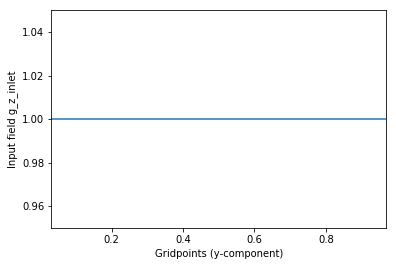

In [12]:
helpers.plot_g_z_inlet(g_z_constant, Inlet(), V)

#### Get stiffness and mass matrices and add forcing term

In [13]:
K, M, L = PECwg.setup(boundary, g_z_constant, mu, eps, V, bc)

#### Observe frequency response with a frequency sweep

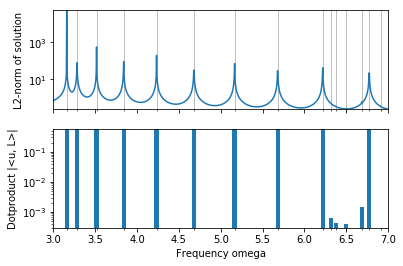

In [6]:
omegas = np.linspace(3, 7, 1000)
_ = helpers.plot_solution_L2_norms(omegas, K, M, L, V, bc)

#### Observe frequency response for an interesting region

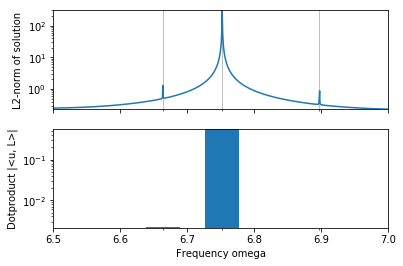

In [7]:
omegas = np.linspace(6.5, 7, 1000)
_, eigvecs, _ = helpers.plot_solution_L2_norms(omegas, K, M, L, V, bc)

#### Plot an explicitly resonant solution

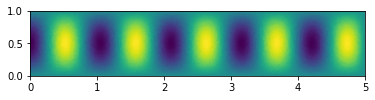

In [8]:
helpers.plot_2d_field(eigvecs[1], V, bc, reduced=True)

#### Plot a L-orthogonal resonant solution

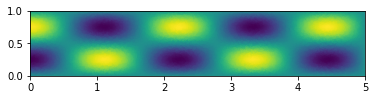

In [9]:
helpers.plot_2d_field(eigvecs[2], V, bc, reduced=True)

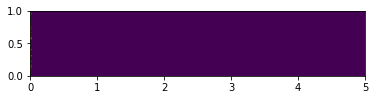

In [10]:
helpers.plot_2d_field(L.get_local(), V, bc, reduced=False)

This is really interesting: Since L is everywhere zero except on the inlet (where it is constant), all eigenmodes that are symmetric at the inlet are orthogonal to L. Therefore, the solution is hindered from exploding! 

## Rectangular waveguide with asymmetric input field

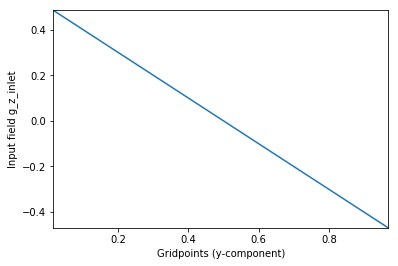

In [11]:
g_z_asymmetric = fen.Expression('0.5-x[1]', degree=2)
helpers.plot_g_z_inlet(g_z_asymmetric, Inlet(), V)

_, _, L = PECwg.setup(boundary, g_z_asymmetric, mu, eps, V, bc)

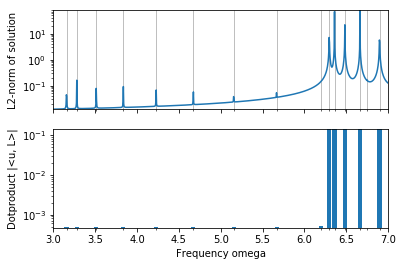

In [12]:
omegas = np.linspace(3, 7, 1000)
_ = helpers.plot_solution_L2_norms(omegas, K, M, L, V, bc)

Because now we have an asymmetric inlet, the symmetric eigenfunctions have vanishing dot products with L, meaning the symmetric eigenmodes do not explode in L2-norm.

#### Seeing if indeed a resonant solution is antisymmetric

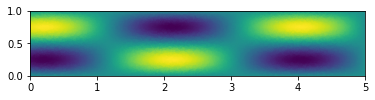

In [13]:
helpers.plot_2d_field(PECwg.solve(6.5, K, M, L, V).vector(), V, bc, reduced=False)

In [16]:
PECwg.solve(6.5, K, M, L, V)

Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 33), FiniteElement('Lagrange', triangle, 1)), 67)

### Non-rectangular (perturbed) waveguide with constant input field

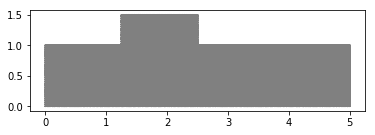

In [14]:
domain = mshr.Rectangle(fen.Point(0.0, 0.0), fen.Point(Lx, Ly)) \
       + mshr.Rectangle(fen.Point(Lx/4, Ly), fen.Point(Lx/2, Ly*3/2))
mesh = mshr.generate_mesh(domain, 128)
fen.plot(mesh)

g_z_constant = fen.Expression('1.0', degree=2)

boundary, V, bc = PECwg.create(mesh, Inlet())

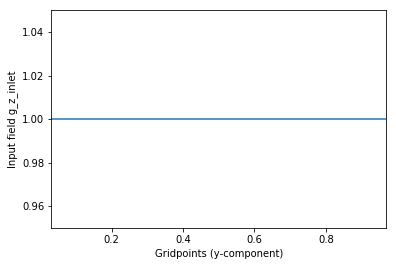

In [15]:
helpers.plot_g_z_inlet(g_z_constant, Inlet(), V)

In [16]:
K, M, L = PECwg.setup(boundary, g_z_constant, mu, eps, V, bc)

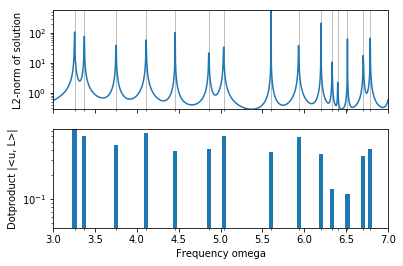

In [17]:
omegas = np.linspace(3, 7, 1000)
_ = helpers.plot_solution_L2_norms(omegas, K, M, L, V, bc)